## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 5: Differential Equations
## Due 6 November, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 4. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of differential equations. To get the full story, an absolutely indispensable book is the one by Hirsch and Smale: https://www.amazon.com/Differential-Equations-Dynamical-Systems-Introduction/dp/0123820103
- The material covered here in particular comes from the beginnings of Chapters 1, 2, 3, 3, 6, 12, and 14.

In [2]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

import seaborn as sns
sns.set()

In [3]:
# This is just a convenience function for plotting things.
def plot_phase_portrait(matrices,titles):
    """Makes a plot of the phase portraits of the given matrices"""
    fig, ax = plt.subplots(1, len(matrices), figsize=(5*len(matrices)+1,5),squeeze=False)
    
    x1,x2 = np.meshgrid(np.linspace(-1, 1, 9),np.linspace(-1, 1, 9))
    
    for i,[matrix,title] in enumerate(zip(matrices,titles)):
        a = np.array(matrix).astype(np.float64)
        x1dot = a[0,0]*x1 + a[0,1]*x2 # x1'(t) = a11 * x1 + a12 * x2
        x2dot = a[1,0]*x1 + a[1,1]*x2  # x2'(t) = a21 * x1 + a22 * x2
        ax[0,i].quiver(x1, x2, x1dot, x2dot, color='r')
        ax[0,i].set_xlabel('$x_1$')
        ax[0,i].set_ylabel('$x_2$')
        ax[0,i].set_title(title)
    return None

### 1. Phase Portraits and Linearization (10pts)

For each of the
following systems, (i) find the equilibria, (ii) linearize the system
around each equilibrium and find the eigenvalues and eigenvectors, (iii)
state whether the system is stable at each equilibrium, (iv) draw a phase
portrait by first drawing the phase portrait near the equilibria and
then interpolating. Compare your drawing to a phase portrait of the entire system generated with Python.

$$
\mathrm{a)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

$$
\mathrm{b)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

The following videos are great for this subject:

"Nonlinear Dynamics and Chaos - Steven Strogatz, Cornell University"

https://www.youtube.com/playlist?list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V

**STEPS:**

$\bullet$ Set $\dot x= 0$ and solve for the roots

$\bullet$ To linearize the nonlinear system we need to build and evaluate the Jacobian, J, at the roots 

$\bullet$ Our A matrix is $J(\bar x)$ i.e. the Jacobian evaluated at the roots/fixed points/equilibria.

$\bullet$ Use sympy to find the eigenvalues of A

$\bullet$ Characterize the stability depending on the signs and values of the eigenvalues

$\bullet$ Use `plot_phase_portrait(*,*)`

1.a)

We consider the fixed points of the system
$$ 
\begin{pmatrix} \dot x_1 \\ \dot x_2 \end{pmatrix}
= \begin{pmatrix} x_2^2 \\ x_1^2 \end{pmatrix}
=\begin{pmatrix} 0 \\ 0 \end{pmatrix}.
$$

The dynamics have a fixed point, $\bar x = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$. So we will linearize about this $\bar x$:

The Jacobian is:

$$
J(\bar x)=
\frac{\partial f}{\partial x} \biggr\rvert_{x = \bar x} = 
\begin{pmatrix}
  \frac{\partial (x_2^2)}{\partial x_1} & \frac{\partial (x_2^2)}{\partial x_2} \\
  \frac{\partial (x_1^2)}{\partial x_1}  & \frac{\partial (x_1^2)}{\partial x_2} 
\end{pmatrix}
$$


$$
J(0,0)=
\frac{\partial f}{\partial x} \biggr\rvert_{x = \bar x} = 
\begin{pmatrix}
  0 & (2x_2) \\
 (2x_1)  & 0
\end{pmatrix}
$$

In [43]:
A1 = sm.Matrix([[0,0], [0,0]])
A1.diagonalize()

⎛⎡1  0⎤  ⎡0  0⎤⎞
⎜⎢    ⎥, ⎢    ⎥⎟
⎝⎣0  1⎦  ⎣0  0⎦⎠

1.b)

We consider the system
$$ 
\begin{pmatrix} \dot x_1 \\ \dot x_2 \end{pmatrix}
= \begin{pmatrix} x_1^2 + x_2^2 \\ x_2 \end{pmatrix}.
$$

The dynamics have a fixed point, $\bar x = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$. So we will linearize about this $\bar x$:

$$J = 
\frac{\partial f}{\partial x} \biggr\rvert_{x = \bar x} = 
\begin{pmatrix}
  \frac{\partial (x_1^2 + x_2^2)}{\partial x_1} & \frac{\partial (x_1^2 + x_2^2)}{\partial x_2} \\
  \frac{\partial (x_2)}{\partial x_1}  & \frac{\partial (x_2)}{\partial x_2} 
\end{pmatrix}\biggr\rvert_{x = \bar x}
$$

(Note that the axes given by the eigenvectors greatly helps us determine the phase portrait intuitively.) 

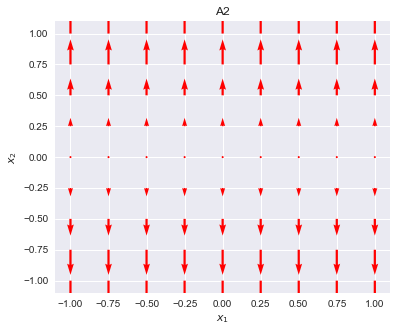

In [5]:
A2 = sm.Matrix([[0,0],
                [0,1]])
A2.diagonalize()

plot_phase_portrait([A2],['A2'])

1.c)

We consider the system:

$$
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}.
$$

The dynamics have periodic fixed points, $\bar x_n = \begin{pmatrix} \bar x_1 \\ \bar x_2 \end{pmatrix}$ for $n\in\mathbb{Z}$. So we will linearize about this general $\bar x_n$:

$$
\frac{\partial f}{\partial x} \biggr\rvert_{x = \bar x} = 
\begin{pmatrix}
  \frac{\partial (\sin{(x_2)})}{\partial x_1} & \frac{\partial (\sin{(x_2)})}{\partial x_2} \\
  \frac{\partial (\cos{(x_1)})}{\partial x_1} & \frac{\partial (\cos{(x_1)})}{\partial x_2} 
\end{pmatrix}\biggr\rvert_{x = \bar x}
$$

### 2. Nonlinear Systems (10pts)

a) Find a single nonlinear systems that has exactly four distinct equilibria, each of which has a different eigenvalue structure (i.e. a different type in the taxonomy). 

b) Find a nonlinear system that has the following phase portrait. Hint: Try polar coordinates. Plot the phase portait in Python.

<img src="https://raw.githubusercontent.com/klavins/ECE447/master/images/limit-cycle.png" width=30%>

**Eigenvalue structures**

$\bullet$ Real, distinct: $\begin{cases} \lambda_1,\lambda_2>0 \implies \text{Unstable node}\\ \lambda_1,\lambda_2<0 \implies \text{Stable node}\\ \text{one positive, one negative} \implies \text{Saddle point}\end{cases}$ 

$\bullet$ Real, repeated: $\begin{cases} \text{two LI eigenvectors} \implies \text{Singular node (could be stable or not)}\\ \text{one LI eigenvector} \implies \text{Degenerate node (could be stable or not)} \end{cases}$

$\bullet$ Real, zero eigenvalue $\implies$ Marginally stable

$\bullet$ Complex: $\begin{cases} Re(\lambda)<0 \implies  \text{Stable focus (i.e. a sprial going toward the center node)} \\ Re(\lambda)>0 \implies  \text{Unstable focus (i.e. a sprial going away the center node)} \\ Re(\lambda)=0  \implies \text{Center node in which the trajectories are circles/ellipses} \end{cases}$


2.a)

Let's make a guess

$$
\begin{align}
\dot x_1 &= (y-x)(1-x-y)\\
\dot x_2 &= x(2+y)
\end{align}$$

This has equilibria at 

$$\begin{pmatrix} 0\\0 \end{pmatrix},\begin{pmatrix} 0\\1 \end{pmatrix}, \begin{pmatrix} -2\\-2 \end{pmatrix}, \begin{pmatrix} 3\\-2 \end{pmatrix}$$

The Jacobian at a particular equilibrium is given by

$$
\frac{\partial f}{\partial x} \biggr\rvert_{x = \bar x} = 
\begin{pmatrix}
   (-1  +2x_1) & (1 - 2x_2)\\
  (2+x_2)  & x_1 
\end{pmatrix}\biggr\rvert_{x = \bar x}
$$

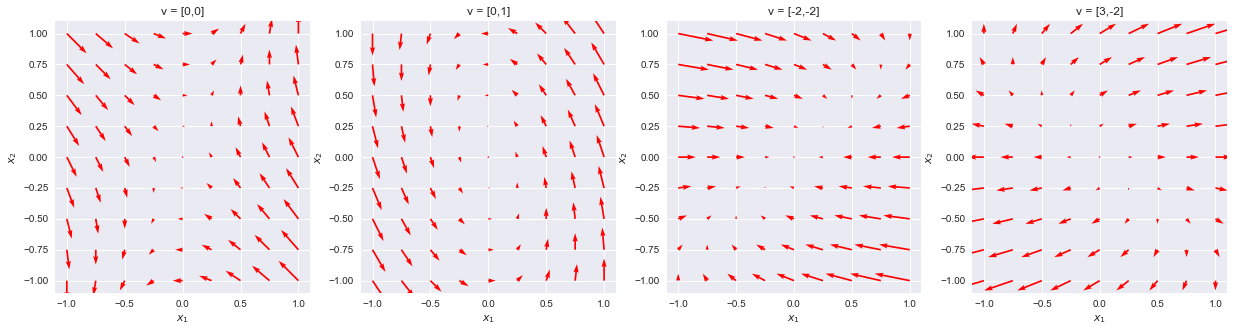

In [13]:
''' Our example which only has 3 of the structures'''

A1 = sm.Matrix([[-1,1],
                [ 2,0]]) # Saddle

A2 = sm.Matrix([[-1,-1],
                [ 3,0]]) # Saddle

A3 = sm.Matrix([[-5, 5],
                [ 0,-2]]) # Stable

A4 = sm.Matrix([[5,5],
                [0, 3]]) # Unstable

plot_phase_portrait([A1, A2, A3, A4],['v = [0,0]','v = [0,1]','v = [-2,-2]','v = [3,-2]'])

2.b)

Nontrivial. Check out the following resources:

$\bullet$ "Differential Equations, Dynamical Systems, and Chaos" by Hirsch CH8

$\bullet$ https://math.stackexchange.com/questions/1724994/phase-portrait-of-ode-in-polar-coordinates

$\bullet$ "Elementary Differential Equations" 9th Ed. by Boyce and DiPrima p555

In [ ]:
# Use the polar plotter for different starting points of r and theta
# plt.polar(theta, r)
# plt.show()

### 3. Tuning Eigenvalues (10pts)

Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k-1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2. For what values of $k$ is the system stable? Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$. 

3.)

Recall that for $A$ to be stable, we require that $\mathrm{Re}(\lambda) < 0$ for all eigenvalues $\lambda$ of $A$.

In [32]:
ex = -1 + sm.sqrt(-1)
ex, sm.re(ex)

(-1 + ⅈ, -1)

In [46]:
k = sm.symbols('k')

#for example
A = sm.Matrix([[k**2, 1-k**2],
               [k**2,   k+1]])
P, D = A.diagonalize()


sm.plot(#real part of 1st eigvalue here, real part of 2nd eigvalue here, (k,-2,2))
D

⎡            ________________________________                                 
⎢ 2         ╱      4      3      2                                            
⎢k    k   ╲╱  - 3⋅k  - 2⋅k  + 3⋅k  + 2⋅k + 1    1                             
⎢── + ─ - ─────────────────────────────────── + ─                         0   
⎢2    2                    2                    2                             
⎢                                                                             
⎢                                                              _______________
⎢                                                   2         ╱      4      3 
⎢                                                  k    k   ╲╱  - 3⋅k  - 2⋅k  
⎢                       0                          ── + ─ + ──────────────────
⎣                                                  2    2                    2

                     ⎤
                     ⎥
                     ⎥
                     ⎥
                     ⎥
               

In [7]:
k = sm.symbols('k')

A = sm.Matrix([[k, -k],[1, k-1]])

eq = A.charpoly()

sm.solve(eq)

⎡⎧         __________    ⎫  ⎧         __________    ⎫⎤
⎢⎪       ╲╱ -4⋅k + 1    1⎪  ⎪       ╲╱ -4⋅k + 1    1⎪⎥
⎢⎨λ: k - ──────────── - ─⎬, ⎨λ: k + ──────────── - ─⎬⎥
⎢⎪            2         2⎪  ⎪            2         2⎪⎥
⎣⎩                       ⎭  ⎩                       ⎭⎦

### 4. Rotations Again (10pts)

Let $\dot x = Ax$

$$
A = \begin{pmatrix}
0 & -w_3 & w_2 \\
w_3 & 0 & -w_1 \\
-w_2 & w_1 & 0
\end{pmatrix}
$$

where $w_i \in \mathbb{R}$. 

a) Show that $A$ is **skew symmetric**, meaning that, that $A^T = -A$.

b) Show that $e^{At}$ is an **orthonormal** matrix. (Recall that $Q$ is orthonormal if $Q^TQ = QQ^T = I$. Use the definition of the matrix exponential as a series. 

c) Show that all points of the form 

$$
x = a \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix},
$$

where $a\in \mathbb{R}$, are equilibrum points. 

d) Choose a few different choices for the $w_i$ and for each choice show example numerical trajectories by plotting the three components of the state $x$ versus time. Also plot the trajectories in the $x_1$ - $x_2$ plane. 

In [33]:
#4.a)
w1, w2, w3, t = sm.symbols('w1 w2 w3 t')

A = sm.Matrix([[0, -w3, w2],[w3, 0, -w1],[-w2, w1, 0]])

print('Does A^T = -A?')

Does A^T = -A?


4.b)

Recall that when $A \in \mathbb{R}^{n\times n}$, then the we define $e^{At}$ by

$$
e^{At} \triangleq I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \dots
$$

Strategy:

$\bullet$ Prove that $(e^{At})^T = e^{A^Tt}$

$\bullet$ Check if $[A^T,A]=0$

$\bullet$ Remember that $[A,B]=0 \implies e^Ae^B = e^{A+B} = e^{B+A} = e^Be^A.$

4.c) Since $\dot x = Ax$ just do out the multiplication! 

In [36]:
#4.d)

def rotation_dynamics(X,t,a,b,c):
    '''
    Assumes: X is our initial conditions, 
             t is a dummy variable of time for our integrator,
             a,b,c are our values for w1,w2,w3
             
    Returns: the dynamics xdot, ydot, zdot
    '''
    x,y,z = X
    return [-c*y + b*z,
            -c*x - a*z,
            -b*x + a*y]

In [ ]:
#Next step is to integrate! 

w1,w2,w3 = 0, sm.pi, sm.pi
X0 = #inital values
t = #shared variable
#Use np.odeint(rotation_dynamics, X0,t, args=(w1,w2,w3))

In [12]:
x,y,z = (1,2,3)
print(x,y,z)

1 2 3


In [37]:
#4.d)


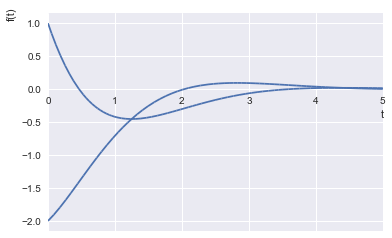

In [35]:
#Example from lecture

#Method: Solve the system using matrix exponentials

A = sm.Matrix([[-1,1],[-1,-1]])
P,D = A.diagonalize()

eAt = P*sm.exp(D*t)*P.inv()
eAt = eAt.simplify()

x = eAt*sm.Matrix([1,-2])

sm.plot(x[0],x[1],(t,0,5)); #This says overlay the x vs t and y vs t trajectories on the same plot

### 5. Analysis of a Bistable Switch

A genetic bistable switch has the model

$$
\dot u = \frac{\alpha_1}{1 + v^2} - u \\
\dot v = \frac{\alpha_2}{1 + u^2} - v 
$$

where $\alpha_1$ and $\alpha_2$ are the expression rates of the two proteins $u$ and $v$, and $\beta$ and $\gamma$ are the called Hill coefficients. The behavior of this system is that when one protein is high, the other should be low.

a) Show that when $\alpha_1 = \alpha_2 = 17/4$ there are two isolated equilibra corresponding to having one protein be high and the other low. Show that these equilibria are unstable. Also show that the set of points where $u=v$ consists of all unstable equilibria.

b) Find values of $\alpha_1$ and $\alpha_2$ for which there is only one equilibrium (assuming positive values for $u$ and $v$). Is this equilibrium stable?

### 6. Simulation 

Using simulation and visualization, explain the behavior of the system

\begin{eqnarray}
\dot x & = & -y - z \\
\dot y & = & x + a y \\
\dot z & = & b + z(x-c)
\end{eqnarray}

where $a=0.2$, $b=0.2$ and $c=5.7$. 

$\bullet$ We have the derivatives but we want x,y,z

$\bullet$ So we need some method to numerically integrate xdot,ydot,zdot

$\bullet$ Can use `np.odeint(f,[x0,y0,z0],t)` to get the solutions

In [ ]:
def Rossler(x, y, z, t, a, b, c):
    '''
    Assumes: x, y, z are spacial variables and a, b, c are constants
    Returns: the Rossler Chaotic attractor dynamics xdot, ydot, zdot 
    '''
    xdot = -y - z
    ydot = x + a*y
    zdot = b + z*(x - c)
    return xdot, ydot, zdot


In [ ]:
a = 0.2
b = 0.2
c = 5.7

t = np.linspace(0., 40, 6000)

X = spi.odeint(f,[x0,y0,z0], t, args=(a,b,c)); #function f, initial values, common variable t, other arguments
#Is 6000 x 3


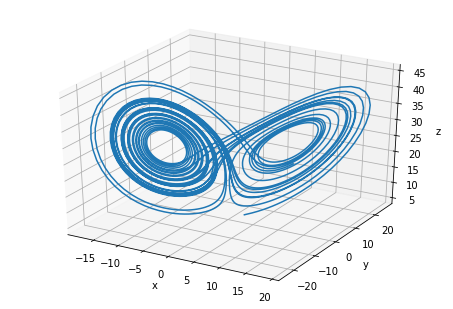

In [10]:
'''The Lorentz Systems for example'''

from scipy.integrate import odeint
from numpy import *
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D

def Lorenz(state,t):
    x = state[0]
    y = state[1]
    z = state[2]

    # set the constants
    sigma = 10.0
    rho = 28.0
    beta = 8.0/3.0

    xd = sigma * (y-x)
    yd = (rho-z)*x - y
    zd = x*y - beta*z

    return [xd, yd, zd]

state0 = [2.0, 3.0, 4.0]
t = arange(0.0, 30.0, 0.01)

state = odeint(Lorenz, state0, t)

fig = plt.figure()
ax = Axes3D(fig)

ax.plot(state[:,0],state[:,1],state[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()